### Задание
Цель:  
изучить применение модели логистической регрессии и метода опорных векторов в задаче бинарной классификации.  
Описание задания:   
В домашнем задании нужно решить задачу классификации физических лиц по уровню дохода. Данные для обучения модели хранятся в файле adult.csv, который можно найти в материалах к занятию или скачать с сайта.
Целевая переменная – уровень дохода income, который принимает два значения <=50K и >50K, поэтому классификация бинарная. 
Остальные признаки описывают персональную информацию – возраст, образование, семейное положение и т. д.
 Подробное описание признаков и их возможные значения можно получить самостоятельно, используя функции Python3 для анализа датасета (describe, unique и т.д)
 или прочитать информацию по ссылке.
Задачу классификации нужно решить при помощи обучения модели логистической регрессии и модели опорных векторов.
  
Этапы работы:
Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)
Проведите первичный анализ.
Проверьте данные на пропуски. Удалите в случае обнаружения. *Предложите альтернативный способ работы с пропусками
Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)
Преобразуйте категориальные признаки.
Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.
Обучите модели логистической регрессии и опорных векторов на обучающем множестве.
Для тестового множества предскажите уровень дохода и сравните с истинным значением, посчитав точность предсказания моделей. Для этого используйте встроенную функцию score.
Сформулируйте выводы по проделанной работе.
Кратко опишите какие преобразования были сделаны с данными.
Сравните точность двух моделей.
Напишите свое мнение, в полной ли мере модели справились с поставленной задачей. *Что по вашему мнению нужно сделать, чтобы улучшить результат ?
  
Для получение зачета по этому домашнему заданию, минимально, должно быть реализовано обучение двух моделей классификации, выведена их точность.
Результат: получены базовые знания по подготовке данных к работе с моделями машинного обучения. Построено 2 модели классификации,
 сделан вывод о целесообразности их применения к данным.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix

pd.set_option('display.max_columns', None) # Unlimeted number of columns
pd.set_option('display.max_colwidth', None) # Unlimited max simbols in names of columns

from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, f1_score

In [105]:
df = pd.read_csv('data/adult.zip')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## 0 EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
for i in df.columns:
    print(f'признак: {i}, count-uniq: {df[i].nunique()}, type: {df[i].dtype}')
    print(df[i].unique())
    print('')

признак: age, count-uniq: 74, type: int64
[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]

признак: workclass, count-uniq: 9, type: object
['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']

признак: fnlwgt, count-uniq: 28523, type: int64
[226802  89814 336951 ... 129912 255835 257302]

признак: education, count-uniq: 16, type: object
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']

признак: educational-num, count-uniq: 16, type: int64
[ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]

признак: marital-status, count-uniq: 7, type: object
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse

* Пропуски имеются в категориальных данных в виде "?"

In [5]:
# Составлю словарь замен
dict_replace = {'?': None, '<=50K':0, '>50K':1, 'Male':1, 'Female':0}

# df_nnan = df.replace('?', None)
df_nnan = df.replace(dict_replace)

df_nnan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  int64 
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 5.6+ MB


In [6]:
#Оставлю только те строки которые имеет не более 1 пропуска 
df_nnan = df_nnan.dropna(thresh=14)
df_nnan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46043 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              46043 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           46043 non-null  int64 
 3   education        46043 non-null  object
 4   educational-num  46043 non-null  int64 
 5   marital-status   46043 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     46043 non-null  object
 8   race             46043 non-null  object
 9   gender           46043 non-null  int64 
 10  capital-gain     46043 non-null  int64 
 11  capital-loss     46043 non-null  int64 
 12  hours-per-week   46043 non-null  int64 
 13  native-country   45232 non-null  object
 14  income           46043 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 5.6+ MB


### Остался только один признак с пропусками, этот пропуск проработаем позже, а пока взгянем на меры центральное тенденции

In [7]:
# check for descret and continuous data
continuous_feats = df_nnan.dtypes[df_nnan.dtypes == 'int64'].index.to_list()
print ('Quantity of features with continuous data : ', len(continuous_feats))

categorial_feats = df_nnan.dtypes[df_nnan.dtypes == 'object'].index.to_list()
print ('Quantity of features with categorial data : ', len(categorial_feats))

df_nnan[continuous_feats].describe()

Quantity of features with continuous data :  8
Quantity of features with categorial data :  7


,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income
count,46043.000000,4.604300e+04,46043.000000,46043.000000,46043.000000,46043.000000,46043.000000,46043.000000
mean,38.552549,1.898106e+05,10.128358,0.675912,1114.090633,88.710075,40.945790,0.248072
std,13.205813,1.054726e+05,2.564224,0.468038,7588.765004,405.275023,12.012468,0.431899
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.176060e+05,9.000000,0.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783530e+05,10.000000,1.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.378565e+05,13.000000,1.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,1.000000,99999.000000,4356.000000,99.000000,1.000000


<AxesSubplot:xlabel='capital-gain', ylabel='Count'>

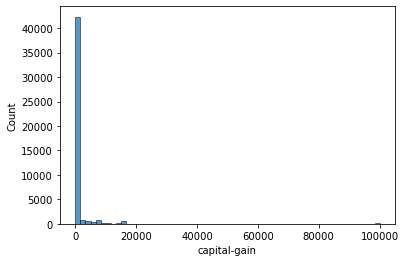

In [8]:
sns.histplot(df_nnan['capital-gain'], bins=60)

<AxesSubplot:xlabel='fnlwgt', ylabel='Count'>

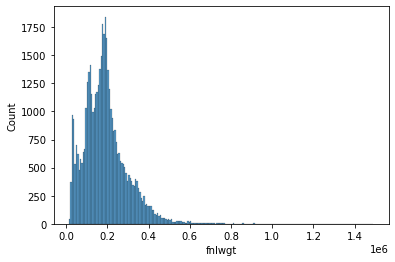

In [9]:
sns.histplot(df_nnan['fnlwgt'])

<AxesSubplot:xlabel='hours-per-week', ylabel='Count'>

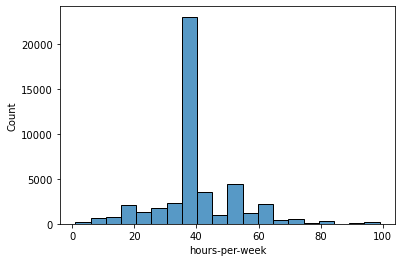

In [10]:
sns.histplot(df_nnan['hours-per-week'], bins=20)

### некоторые экстремумы показались выбросами-ошибками, но после детального анализа, вполне себе данные описывающие характер данных

In [11]:
df_nnan.corr()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income
age,1.000000,-0.075805,0.037872,0.081609,0.079934,0.059495,0.102475,0.237452
fnlwgt,-0.075805,1.000000,-0.040156,0.028644,-0.004254,-0.004374,-0.018277,-0.006891
educational-num,0.037872,-0.040156,1.000000,0.005182,0.126393,0.081498,0.145291,0.332352
gender,0.081609,0.028644,0.005182,1.000000,0.047030,0.046258,0.230181,0.215719
capital-gain,0.079934,-0.004254,0.126393,0.047030,1.000000,-0.032135,0.082990,0.221653
capital-loss,0.059495,-0.004374,0.081498,0.046258,-0.032135,1.000000,0.055580,0.149426
hours-per-week,0.102475,-0.018277,0.145291,0.230181,0.082990,0.055580,1.000000,0.226861
income,0.237452,-0.006891,0.332352,0.215719,0.221653,0.149426,0.226861,1.000000


### Теперь попытаемся устранить пропуск путем прогнозирования, какой-нибудь моделью

#### Стандартная корреляция пирсона, показывает малые значения, что может говорить о нелинейной зависимости, воспользуюсь другой библиотекой

In [12]:
phik_overview = df_nnan.phik_matrix(interval_cols=continuous_feats)
phik_overview.sort_values('income', ascending=False)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
income,0.406044,0.217956,0.017175,0.461000,0.464105,0.418557,0.440690,0.624129,0.081984,0.332255,0.374738,0.258174,0.352315,0.114538,1.000000
relationship,0.461097,0.158470,0.032682,0.237222,0.207392,0.676642,0.341733,1.000000,0.143017,0.842196,0.115157,0.121056,0.306578,0.173017,0.624129
educational-num,0.299618,0.180388,0.060384,1.000000,1.000000,0.152632,0.500828,0.207392,0.166510,0.113297,0.188516,0.116103,0.275417,0.435361,0.464105
education,0.266719,0.277488,0.049376,1.000000,1.000000,0.181655,0.498828,0.237222,0.139040,0.111909,0.220626,0.096052,0.227813,0.426252,0.461000
occupation,0.232954,0.514765,0.043907,0.498828,0.500828,0.331077,1.000000,0.341733,0.151450,0.551677,0.134609,0.084062,0.312872,0.219652,0.440690
marital-status,0.492492,0.143079,0.043500,0.181655,0.152632,1.000000,0.331077,0.676642,0.128324,0.431815,0.064275,0.110046,0.228988,0.147775,0.418557
age,1.000000,0.190902,0.079445,0.266719,0.299618,0.492492,0.232954,0.461097,0.060409,0.157756,0.108386,0.124872,0.419919,0.088600,0.406044
capital-gain,0.108386,0.094798,0.000000,0.220626,0.188516,0.064275,0.134609,0.115157,0.018769,0.068209,1.000000,0.013379,0.108417,0.044462,0.374738
hours-per-week,0.419919,0.205368,0.044237,0.227813,0.275417,0.228988,0.312872,0.306578,0.142010,0.315383,0.108417,0.082796,1.000000,0.088299,0.352315
gender,0.157756,0.189269,0.038102,0.111909,0.113297,0.431815,0.551677,0.842196,0.093811,1.000000,0.068209,0.084001,0.315383,0.068099,0.332255


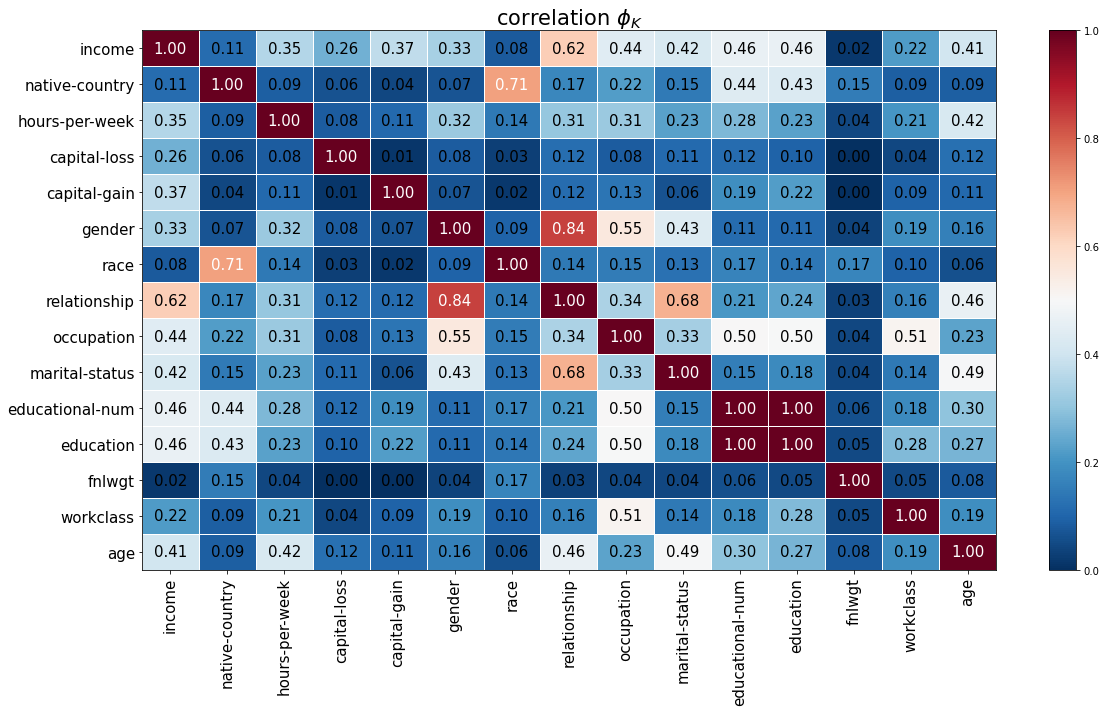

In [13]:
plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map='RdBu_r', title=r'correlation $\phi_K$', fontsize_factor=1.5,
                        figsize=(17,10))
plt.tight_layout()

* Признак  с пропуском native-country слабо скоррелирован с целевой переменно

In [17]:
pd.DataFrame.pivot_table(df_nnan, index=['native-country'], aggfunc=['median','mean'])#.sort_values('educational-num', ascending=False)

median                                            \
                              age capital-gain capital-loss educational-num   
native-country                                                                
Cambodia                     36.5            0            0            10.0   
Canada                       42.0            0            0            10.0   
China                        40.0            0            0            13.0   
Columbia                     37.0            0            0             9.0   
Cuba                         46.0            0            0            10.0   
Dominican-Republic           38.0            0            0             8.0   
Ecuador                      32.0            0            0             9.0   
El-Salvador                  32.0            0            0             7.0   
England                      40.0            0            0            12.0   
France                       39.5            0            0            13.0   
Germany                      36.0            0            0            10.0   
Greece                       48.0            0            0             9.0   
Guatemala                    28.0            0            0             6.0   
Haiti                        40.0            0            0             9.0   
Holand-Netherlands           32.0            0         2205            10.0   
Honduras                     31.0            0            0             9.0   
Hong                         33.0            0            0            11.5   
Hungary                      53.5            0            0            11.5   
India                        36.0            0            0            13.0   
Iran                         37.0            0            0            13.0   
Ireland                      32.0            0            0             9.0   
Italy                        46.5            0            0             9.0   
Jamaica                      35.0            0            0             9.0   
Japan                        36.0            0            0            11.0   
Laos                         34.0            0            0            10.0   
Mexico                       31.0            0            0             5.0   
Nicaragua                    32.0            0            0             9.0   
Outlying-US(Guam-USVI-etc)   40.5            0            0            10.0   
Peru                         37.0            0            0            10.0   
Philippines                  38.0            0            0            11.0   
Poland                       39.0            0            0            10.0   
Portugal                     38.0            0            0             7.0   
Puerto-Rico                  39.0            0            0             9.0   
Scotland                     48.0            0            0            10.0   
South                        36.0            0            0            10.0   
Taiwan                       34.0            0            0            14.0   
Thailand                     38.0            0            0            11.0   
Trinadad&Tobago              39.5            0            0             9.0   
United-States                37.0            0            0            10.0   
Vietnam                      30.0            0            0            10.0   
Yugoslavia                   41.0            0            0             9.0   

                                                                        mean  \
                              fnlwgt gender hours-per-week income        age   
native-country                                                                 
Cambodia                    200128.5    1.0             40      0  37.923077   
Canada                      181667.0    1.0             40      0  42.846626   
China                       160261.0    1.0             40      0  41.460177   
Columbia                    200401.0    1.0             40      0  39.

In [15]:
df_nnan['native-country'].describe()

count             45232
unique               41
top       United-States
freq              41302
Name: native-country, dtype: object

#### Закодирую признак в числовое представление

In [21]:
df_nnan.reset_index(drop=True, inplace=True)

y_codes, y_cats = pd.factorize(df_nnan['native-country'], na_sentinel=None)
print(y_codes, y_cats, y_cats[y_codes], sep='\n\n')

[0 0 0 ... 0 0 0]

Index([             'United-States',                       'Peru',
                        'Guatemala',                     'Mexico',
               'Dominican-Republic',                    'Ireland',
                          'Germany',                'Philippines',
                         'Thailand',                      'Haiti',
                      'El-Salvador',                'Puerto-Rico',
                          'Vietnam',                      'South',
                         'Columbia',                      'Japan',
                            'India',                   'Cambodia',
                           'Poland',                       'Laos',
                          'England',                       'Cuba',
                           'Taiwan',                      'Italy',
                           'Canada',                   'Portugal',
                            'China',                  'Nicaragua',
                         'Honduras',       

In [24]:
ohe = OneHotEncoder(max_categories=23, sparse=False)

X = ohe.fit_transform(df_nnan[['race', 'education', 'occupation']])
X = pd.DataFrame(X, index=df_nnan.index)

y = pd.Series(y_codes, name='y', index=df_nnan.index)

In [25]:
df_nativie_country = pd.concat([X, y], axis=1).convert_dtypes()
df_nativie_country.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,y
0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [26]:
valid = df_nativie_country[df_nativie_country['y']==41]
not_valid = df_nativie_country[df_nativie_country['y']!=41]
X_train, X_test, y_train, y_test = train_test_split(not_valid.drop(['y'], axis=1), not_valid['y'], test_size=0.3, random_state=0)
X_valid, y_valid = valid.drop(['y'], axis=1), valid['y']

In [27]:
# model K-Nearest Neighbors
model_KNN = KNeighborsClassifier()
model_KNN.fit(X_train, y_train.to_list())
KNN_pred = model_KNN.predict(X_test)

In [28]:
# model Decision Tree
model_DT = DecisionTreeClassifier(class_weight='balanced')
model_DT.fit(X_train, y_train.to_list())
DT_pred = model_DT.predict(X_test)

In [43]:
%%time
model_LR = LogisticRegression(multi_class='ovr', max_iter=2000, class_weight='balanced', solver='saga', C=0.1, random_state=0, n_jobs=-1)
native_country_LR = model_LR.fit(X_train, y_train.to_list())
y_pred_LR = native_country_LR.predict(X_test)


C:\ProgramData\Anaconda3\envs\sklearn-env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\envs\sklearn-env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\envs\sklearn-env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\envs\sklearn-env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\envs\sklearn-env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\

CPU times: total: 56min 36s
Wall time: 4min 3s


### Замечание:
Для LR представлять признаки через OHE скорее всего ошибочно, достаточно LE или pd.factorize

In [44]:
%time
model_SVC = SVC(decision_function_shape='ovo', class_weight='balanced', C=10, cache_size=800, gamma='auto')
native_country_SVC = model_SVC.fit(X_train, y_train.to_list())
y_pred_SVC = native_country_SVC.predict(X_test)

CPU times: total: 0 ns
Wall time: 0 ns


In [45]:
print('Baseline: input moda')
print(pd.Series(y_test == 0).value_counts())
print()
print('input by predict LR')
print(pd.Series(y_test == y_pred_LR).value_counts())
print()
print('input by predict SVC')
print(pd.Series(y_test == y_pred_SVC).value_counts())
print()
print('input by predict KNN')
print(pd.Series(y_test == KNN_pred).value_counts())
print()
print('input by predict DT')
print(pd.Series(y_test == DT_pred).value_counts())
DT_pred


Baseline: input moda
True     12337
False     1233
Name: y, dtype: Int64

input by predict LR
False    13545
True        25
Name: y, dtype: Int64

input by predict SVC
False    13282
True       288
Name: y, dtype: Int64

input by predict KNN
True     12364
False     1206
Name: y, dtype: Int64

input by predict DT
False    13006
True       564
Name: y, dtype: Int64


array([34, 38, 27, ..., 18, 39, 38], dtype=int64)

## Заполнять пропуски буду с помощью DT модели, разница с медианой хоть и незначительная, но предполагаю, что ошибок первого рода меньше, т.е. ложно положительных( прогнозирование доминируещего признака=0, будет точнее, а ошибка второго рода, обобщим их как прогнозирование обощенного признака != 0, имеет меньшее значение, что с чем перепутала модель главное что это не доменантный признак=0.

In [43]:
DT_pred_valid = model_DT.predict(X_valid)
native_country = pd.Series(df_nativie_country['y'], name='native_country')
native_country[native_country==41] = DT_pred_valid

In [44]:
df_full = df_nnan.copy()
df_full['native_country'] = native_country
X = df_full.drop(columns=['native-country', 'income'])
y = df_full['income']

### Преступим к прогнозированию конечной переменной

In [96]:
df_full.income.value_counts()# класс не сбалансирован, учтем это в гиперпараметрах модели

0    34621
1    11422
Name: income, dtype: int64

In [45]:
X_cat = X[['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race']].copy()
X_decret = X.drop(columns = X_cat.columns).copy()

# from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
# coder = OrdinalEncoder()
# coder = OneHotEncoder(max_categories=20, sparse=False)
# X_coder_cat = coder.fit_transform(X_cat)

# X_coder_cat = pd.DataFrame(X_coder_cat, columns=X_cat.columns).astype('int')
# X_coder_cat = pd.DataFrame(X_coder_cat).astype('int')
X_coder_cat = pd.get_dummies(X_cat, drop_first=True)

X_coder_cat.head()

,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [46]:
from sklearn.preprocessing import quantile_transform

X_desc_scale = pd.DataFrame(quantile_transform(X_decret, n_quantiles=15, random_state=0, copy=True), columns= X_decret.columns)
X = pd.concat([X_coder_cat, X_desc_scale], axis=1)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [97]:
%%time
model_LR = LogisticRegression(max_iter=2000, solver='saga', C=0.1, random_state=0, n_jobs=-1, class_weight='balanced')
native_country_LR = model_LR.fit(X_train, y_train.to_list())
# y_pred_LR = native_country_LR.predict(X_test)
model_LR.score(X_test, y_test)

CPU times: total: 953 ms
Wall time: 954 ms


0.8022153044233693

In [102]:
%%time
model_LR = LogisticRegression(max_iter=2000, solver='saga', C=0.1, random_state=0, n_jobs=-1)
native_country_LR = model_LR.fit(X_train, y_train.to_list())
# y_pred_LR = native_country_LR.predict(X_test)
model_LR.score(X_test, y_test)

CPU times: total: 891 ms
Wall time: 907 ms


0.8450010859335408

In [87]:
%time
model_SVC = SVC(decision_function_shape='ovo', C=0.1, cache_size=4000, gamma='auto', kernel='linear')
native_country_SVC = model_SVC.fit(X_train, y_train.to_list())
# y_pred_SVC = native_country_SVC.predict(X_test)
model_SVC.score(X_test, y_test)

CPU times: total: 0 ns
Wall time: 0 ns


0.8431911966987621

In [93]:
%time
from sklearn.svm import LinearSVC

model_lSVC = LinearSVC(C=0.01, dual=True, penalty='l2', loss='squared_hinge', max_iter=2000)
native_country_lSVC = model_lSVC.fit(X_train, y_train.to_list())
# y_pred_SVC = native_country_SVC.predict(X_test)
model_lSVC.score(X_test, y_test)

CPU times: total: 0 ns
Wall time: 0 ns


0.8460870194744081

## Итог:
#### В данном ноутбуке попытался, не просто дропнуть все пропуски, а оставить  побольше данных. Модель LR показала себя немного лучше, чем SVM. Самое непонятное, что указываю модели чтобы она сама сбалансировала класс, то результаты в обоих типах модели получается хуже. Почему так?  В итоге скор получился 0.85 считаю что очень даже приемленый.